## EOSC 453 Assignment 4
### Francis Rossmann

#### Question 1: 
*Calculation of thermal subsidence history and stretch factor ().  Read the “Inversion of the stretch factor from thermal subsidence data” (from Allen and Allen “Basin Analysis”, 3rd edition, p. 497–498).*

*Consider an intracontinental rift that experienced thermal subsidence over the last 100 Myr, following an initial period of extensional faulting.  The subsidence history can be understood in terms of the depths of dated horizons over time.  These depths are corrected for post-depositional compaction, paleobathymetry, eustasy, and isostatic compensation.  The values for one particular case are shown in Table 1.  The left column provides the ages/times at which the marker horizon was at the corresponding elevation shown in the right column (negative values are below sea level).*
___

Table 1
Age (Myr before present)		Elevation (km)
100					0.217
65					-1.031
55					-1.251
20					-1.704
0					-1.854


Table 2
yL = 110 km			yc = 31 km
Tm = 1333°C			K = 10-6 m2/s
 = 3.3 x 10-5 (°C-1)		m = 3300 kg/m3
s = 2100 kg/m3		w = 1035 kg/m3

___ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#%% QUESTION 1
# preliminaries:
y_l = 110 * 1000  # m
y_c = 31 * 1000  # m
Tm = 1333  # °C
K = 10 ** (-6)  # m2s-1
alpha = 3.3e-5  # (°C-1)
rho_m = 3300  # kg/m3
rho_s = 2100  # kg/m3
rho_w = 1035  # kg/m3

times = np.array([100, 65, 55, 20, 0])  # Myr ago?
elevations = -np.array([0.217, -1.031, -1.251, -1.704, -1.854]) * 1000  # m


- *(1A) Plot the data in Table 1 to produce a curve for tectonic (or thermal) subsidence since 100 Ma (5 pts).*  
- *(1B) Then use the values in Table 2 to calculate the thermal time constant () for this basin (watch your units) (5 pts).*
- *(1C) Plot the subsidence values from Table 1 against the parameter (1-e-t/), remembering that t is time since rifting, not the age (5 pts).*
- *(1D) Fit a curve to this plot, and determine the slope of the curve (5 pts).*  
    - *Now follow Allen and Allen’s approach to determine E0 and  (realize that you will need to use the iterative method of solution to determine ).*  
- *(1E) Compute the results of E0 and  for the competing cases in which the basin was:* 
    - *(1E.1) filled with water vs.* 
    - *(1E.2) filled with sediment (15 pts).*  


*(1F) Explain the geodynamic reasons for the different values of  that result (15 pts).*



Thermal time constant: 38.9 Myr
The slope of the linear regression is -1726.6292314099808
Water filled basin:
 	Beta = 1.9
 	E0 = 2.9e+03
Seds filled basin:
 	Beta = 1.36
 	E0 = 5.4e+03


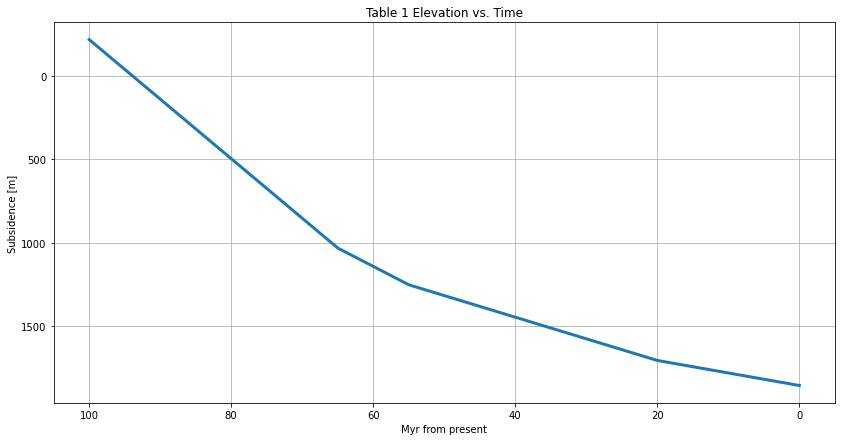

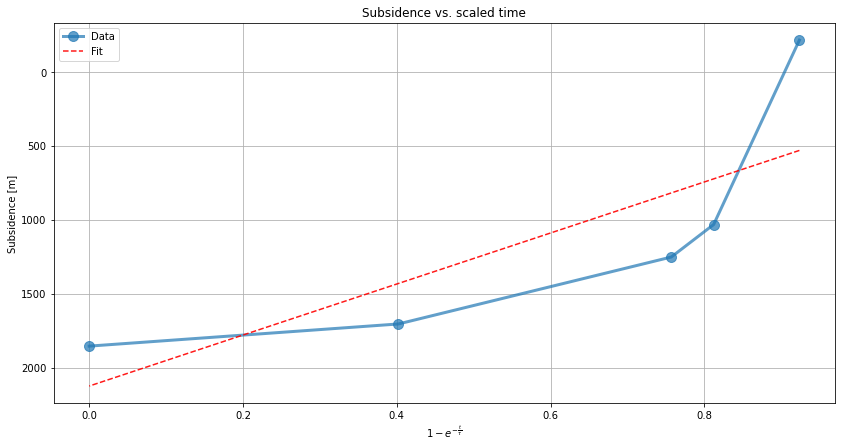

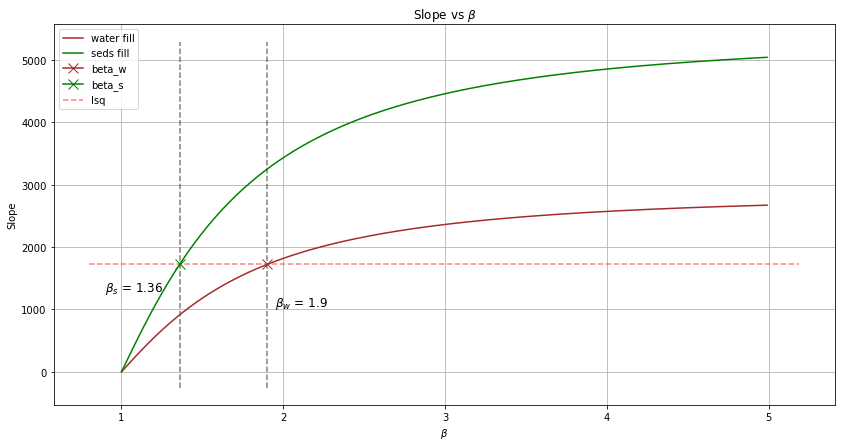

In [5]:
#  a)
fig = plt.figure(figsize=(14, 7))
plt.plot(times, elevations, linewidth=3)
plt.grid()
plt.ylabel("Subsidence [m]")
plt.xlabel("Myr from present")
plt.title("Table 1 Elevation vs. Time")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


# b)
# calculate the thermal time constant:
tau = (y_l ** 2) / (np.pi ** 2 * K)  # seconds...
tau_myr = tau / 60 / 60 / 24 / 365 / 1e6
print(f"Thermal time constant: {tau_myr:.1f} Myr")


#  c)
#  plot subsidence against scaled time constant:
etime = 1 - np.exp(-times / tau_myr)  # dimensionless [Myr/Myr]


#  d) 
# fit a line with linear least squares (simple)
A = np.vstack([etime, np.ones(len(etime))]).T
m, c = np.linalg.lstsq(A, elevations, rcond=None)[0]
print(f"The slope of the linear regression is {m}")

# make the plot:
plt.figure(figsize=(14, 7))
plt.plot(
    etime, elevations, label="Data", linewidth=3, markersize=20, marker=".", alpha=0.7
)
plt.plot(etime, m * etime + c, "r", label="Fit", linestyle="--", alpha=0.9)
plt.legend()
plt.ylabel("Subsidence [m]")
plt.xlabel(r"$1-e^{-\frac{t}{\tau}}$")
plt.title("Subsidence vs. scaled time")
plt.grid()
plt.gca().invert_yaxis()


#  e) find E0 and beta...
E0_w = (4 * y_l * rho_m * alpha * Tm) / (np.pi ** 2 * (rho_m - rho_w))  # for water
E0_s = (4 * y_l * rho_m * alpha * Tm) / (np.pi ** 2 * (rho_m - rho_s))  # for seds


dummy_betas = np.arange(1, 5, 0.01)


def get_slopes(E0, betas):
    """slope is equal to E0*(beta/pi)*sin(pi/beta) (from Allen&Allen pg. 511)
    we know slope and beta so shotgun some slopes for different betas"""
    slopes = [E0 * (beta / np.pi) * np.sin(np.pi / beta) for beta in betas]
    return slopes


slopes_w = get_slopes(E0_w, dummy_betas)
slopes_s = get_slopes(E0_s, dummy_betas)
beta_w = dummy_betas[np.isclose(slopes_w, -m, rtol=0.003)]
beta_s = dummy_betas[np.isclose(slopes_s, -m, rtol=0.01)]
print(f"Water filled basin:\n \tBeta = {beta_w[0]:.3}\n \tE0 = {E0_w:.2}")
print(f"Seds filled basin:\n \tBeta = {beta_s[0]:.3}\n \tE0 = {E0_s:.2}")


fig = plt.figure(figsize=(14, 7))
plt.plot(dummy_betas, slopes_w, color="brown", label="water fill")
plt.plot(dummy_betas, slopes_s, color="g", label="seds fill")
plt.xlabel(r"$\beta$")
plt.ylabel("Slope")
xl = plt.xlim()
plt.hlines(-m, xl[0], xl[1], color="r", linestyle="--", alpha=0.5, label=f"lsq")
yl = plt.ylim()
plt.vlines(beta_w, yl[0], yl[1], color="k", linestyle="--", alpha=0.5)
plt.vlines(beta_s, yl[0], yl[1], color="k", linestyle="--", alpha=0.5)

plt.title(r"Slope vs $\beta$")
plt.grid()
plt.plot(beta_w, -m, marker="x", color="brown", markersize=10, label="beta_w")
plt.plot(beta_s, -m, marker="x", color="g", markersize=10, label="beta_s")
plt.legend()
plt.text(1.95, 1050, r"$\beta_{w}$ = " + f"{beta_w[0]:.3}", fontsize=12);
plt.text(0.9, 1300, r"$\beta_{s}$ = " + f"{beta_s[0]:.3}", fontsize=12);

# f) reasoning.



#### Question 2: 
*"Geohistory” analysis is a useful procedure for understanding basin evolution in terms of sediment accumulation history and tectonic subsidence.  Tectonic subsidence is defined as the vertical (downward) subsidence of a reference horizon (commonly the underlying, pre-basinal basement) in the absence of water and sediment loads.  Tectonic subsidence is driven principally by tectonic forces associated with basin evolution. After deposition, sediments are compacted to varying degrees depending on the lithology and the amount of burial (“overburden”).  In order to construct a “geohistory” diagram for a particular basin, geoscientists first need to remove the effects of compaction.  Mathematical “decompaction” is accomplished by a technique called “backstripping” in which the effects of water loading and sediment loading are removed.  In order to understand the history of tectonic subsidence, further corrections can be made if data are available for the water depth, global sea level, etc. The following exercises will improve understanding of the techniques involved in backstripping, and the generation of diagrams that depict the history of sediment accumulation and tectonic subsidence during basin evolution.*
___

- 2(A)  Decompaction..  Consider the stratigraphic column provided above, consisting of 6 stratigraphic units and 1 unconformity.  These 7 elements have a total observed thickness of 5100 meters.  Using the methods and equations discussed in class, generate a table listing the original “decompacted” thicknesses for each of the 7 units.  The table provided will help visualize the series of steps involved in the backstripping process (15 pts).!

- 2(B)  Sediment Accumulation History.  Now, consider the stratigraphic ages provided for the 7 elements (6 stratigraphic units and 1 unconformity).  First, construct a sediment accumulation diagram based on (1) the compacted (observed) stratigraphic thicknesses and (2) the decompacted stratigraphic thicknesses (10 pts).

- 2(C)  Tectonic subsidence.  In order to understand tectonic subsidence, we must consider the original water depths during deposition, and correct the sediment accumulation history calculated in 2(B).  For each stratigraphic unit, consider the estimated water depths at the time of deposition.  Based on these water depths, modify the sediment accumulation diagram from 2(B). Conduct an Airy isostatic correction at each point in the subsidence curve to estimate the tectonically driven subsidence (15 pts). 

- 2(D)  Interpretation.  Provide a written summary for the depositional history of this basin (10 pts).

___
Porosity-depth coefficient "c"; initial porosity; grain density.									
c	initial porosity   lithology	grain density		    references	              	
0.0005		0.5	      shale	2720  kg/m3	 estimated values (Angevine et al., Fig. 3.11)	
0.0003		0.4	   sandstone	2650  kg/m3	 estimated values (Angevine et al., Fig. 3.11)	
0.0007		0.5	   limestone	2710  kg/m3	 estimated values (Angevine et al., Fig. 3.11)	


In [ ]:
# %% QUESTION 2:
# preliminaries:
# set the constants for each lithology:
# shale = {}
shale = {"c": 0.0005, "phi": 0.5, "rho": 2720}

sand = {"c": 0.0003, "phi": 0.4, "rho": 2650}

lime = {"c": 0.0007, "phi": 0.5, "rho": 2710}

# pack all the lithologies in a dictionary:
vars = {"shale": shale, "sand": sand, "lime": lime, "none": None}

# set up the problem:
depths = np.array(
    [0, 1000, 1800, 1900, 1900, 2800, 2900, 5100]
)  # top down depths to edges
depths_delta = np.array([1000, 800, 100, 0, 900, 100, 2200])  # top down thickneses
midpoints = depths[1:] - depths_delta / 2
liths = [
    "lime",
    "shale",
    "sand",
    "none",
    "lime",
    "shale",
    "sand",
]  # top down lithologies

#%% decompaction:

# 1) calculate in situ compacted porosities:
phis = np.zeros_like(depths_delta, dtype=object)
for ii in range(len(liths)):
    if depths_delta[ii] > 0:
        phis[ii] = vars[liths[ii]]["phi"] * np.exp(
            -vars[liths[ii]]["c"] * midpoints[ii]
        )
    else:
        phis[ii] = 0


def update_phi(consts, midpoint):
    """Updates porosity given a change in burial midpoint"""
    phi_new = consts["phi"] * np.exp(-consts["c"] * midpoint)
    return phi_new


def update_T(height, phi_old, phi_new):
    """Updates the thickness of a layer given a change in porosity"""
    T_new = ((1 - phi_old) * height) / (1 - phi_new)
    return T_new


#%%
# Initialize empty arrays for decompacted porosity and thicknesses:
phi_array = np.zeros(shape=(7, 7))
T_array = np.zeros(shape=(7, 7))
phi_array[:, 0] = phis.T  # set the first column to initial porosity @ depth
T_array[:, 0] = depths_delta.T  # set first column to initial thicknesses

# Iteratively decompact by looping over columns:
for ii in range(1, 7):
    # then loop over rows (blocks):
    for jj in range(1, 7):
        # default to zero porosity and height at the unconfomity:
        if np.all(T_array[jj, :] == 0):
            phi_array[jj, ii] = 0
            T_array[jj, ii] = 0
        # skip the blocks we've removed:
        elif jj < ii:
            phi_array[jj, ii] = 0
            T_array[jj, ii] = 0
        # remove the top block and use midpoint for porosity calculation:
        elif jj == ii:
            phi_array[jj, ii] = update_phi(vars[liths[jj]], T_array[jj, ii - 1] / 2)
            T_array[jj, ii] = update_T(
                T_array[jj, ii - 1], phi_array[jj, ii - 1], phi_array[jj, ii]
            )
        # solve for underlying blocks, using adjusted midpoints:
        else:
            phi_array[jj, ii] = update_phi(
                vars[liths[jj]],
                np.sum(T_array[:, ii][ii - 1 : jj]) + T_array[jj, ii - 1] / 2,
            )
            T_array[jj, ii] = update_T(
                T_array[jj, ii - 1], phi_array[jj, ii - 1], phi_array[jj, ii]
            )


decompacted_depths = np.append(np.sum(T_array, axis=0), 0)

T_table = pd.DataFrame(T_array)
phi_table = pd.DataFrame(phi_array)
# %%
# make a subsidence curve...
ages = [0, 10, 20, 30, 50, 60, 70, 75][::-1]  # Ma, reversed

fig = plt.figure(figsize=(14, 7))
ax = plt.subplot()
plt.plot(ages, depths, label="Compacted")
plt.plot(ages, decompacted_depths[::-1], label="Decompacted")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.ylabel("Depth [m]")
ax.set_xlabel("Absolute age [Ma]")
plt.title("Subsidence history")
plt.legend()


# %% add the bathymetric correction:
bath_heights = [200, 500, 1000, 0, 200, 500, 100]  # relative sea level [m]
bath_depths = [200, 300, 500, 0, 100, 300, 100]  # water 'thickness'' [m]

# calculate the bulk density of each layer per column:
def update_local_rho(phi, consts):
    """eq. 9.34, Allen & Allen"""
    rho_w = 1035  # kgm-3, water density
    rho_new = phi * rho_w + (1 - phi) * consts["rho"]
    return rho_new


rho_array = np.zeros_like(phi_array)
# loop over columns, then rows:
for ii in range(7):
    for jj in range(7):
        # unconformity defaults to zero:
        if np.all(T_array[jj, :] == 0):
            rho_array[jj, ii] = 0
            # skip the blocks we've removed:
        elif jj < ii:
            rho_array[jj, ii] = 0
            # otherwise update the density for updated porosity:
        else:
            rho_array[jj, ii] = update_local_rho(phi_array[jj, ii], vars[liths[jj]])


# then calculate the bulk density of the entire column:
# eq. 9.35
column_rho = np.zeros(shape=(7,))
for ii in range(7):
    column_rho[ii] = np.sum(
        (rho_array[:, ii] * T_array[:, ii]) / decompacted_depths[ii]
    )

# calculate Airy compensated tectonic subsidence for each column:
# eq. 9.37
sub_corr = np.zeros(shape=(7,))
for ii in range(7):
    sub_corr[ii] = decompacted_depths[ii] * (
        (rho_m - column_rho[ii]) / (rho_m - rho_w)
    ) + (bath_depths[ii])

corrected_depths = np.append(sub_corr, 0)[::-1]  # slap a zero on the end and reverse


# %% make a final figure:

fig, ax = plt.subplots(figsize=(14, 7))
ax = plt.subplot()
plt.plot(ages, depths, label="Compacted", marker=".", markersize=10)
plt.plot(ages, decompacted_depths[::-1], label="Decompacted", marker=".", markersize=10)
plt.plot(ages, corrected_depths, label="Tectonic subsidence", marker=".", markersize=10)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid()
plt.ylabel("Thickness [m]")
ax.set_xlabel("Absolute Time [Ma]")
plt.title("Subsidence curve")
xl = plt.xlim()
yl = plt.ylim()
ax.axvspan(30, 50, alpha=0.1, color="k", label="Unconformity")
plt.legend()

# %%
